In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7635894076536572147, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14512029696
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2623242514053357799
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [3]:
!cat /proc/meminfo

MemTotal:       13302924 kB
MemFree:         9334132 kB
MemAvailable:   12068096 kB
Buffers:          128300 kB
Cached:          2594608 kB
SwapCached:            0 kB
Active:          1304648 kB
Inactive:        2276676 kB
Active(anon):     666100 kB
Inactive(anon):    10676 kB
Active(file):     638548 kB
Inactive(file):  2266000 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               132 kB
Writeback:             0 kB
AnonPages:        858416 kB
Mapped:           604128 kB
Shmem:             11408 kB
KReclaimable:     141780 kB
Slab:             197588 kB
SReclaimable:     141780 kB
SUnreclaim:        55808 kB
KernelStack:        4976 kB
PageTables:         8544 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651460 kB
Committed_AS:    3671828 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       51116 kB
VmallocChunk:          0 kB
Percpu:          

# LOAD DATASET MNIST

In [4]:
pip install python_mnist

In [2]:
from mnist import MNIST
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets
import scipy.stats as stats
from numpy import mean
from numpy import std
from skopt.space import Integer
from skopt.space import Real
from skopt.space import Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#! [ ! -z "$COLAB_GPU" ] && pip install torch scikit-learn==0.20.* skorch

In [4]:
mnist = fetch_openml('mnist_784', cache=False)

In [5]:
mnist.data.shape

(70000, 784)

Preprocessing Data
Each image of the MNIST dataset is encoded in a 784 dimensional vector, representing a 28 x 28 pixel image. Each pixel has a value between 0 and 255, corresponding to the grey-value of a pixel.
The above featch_mldata method to load MNIST returns data and target as uint8 which we convert to float32 and int64 respectively.

In [6]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

 To avoid big weights that deal with the pixel values from between [0, 255], we scale X down. A commonly used range is [0, 1].

In [7]:
X /= 255.0

In [8]:
X.min(), X.max()

(0.0, 1.0)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [10]:
assert(X_train.shape[0] + X_test.shape[0] == mnist.data.shape[0])

In [11]:
X_train.shape, y_train.shape

((63000, 784), (63000,))

In [12]:
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

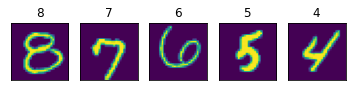

In [13]:
plot_example(X_train, y_train)

In [17]:
X_test.shape, y_test.shape

((7000, 784), (7000,))

In [36]:
# pip install keras

In [37]:
#mnist = datasets.load_digits()


(-0.5, 27.5, 27.5, -0.5)

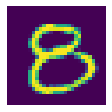

In [18]:
import matplotlib.pyplot as plt
digit = X_train[0]
digit_pixels = digit.reshape(28, 28)
plt.subplot(131)
plt.imshow(digit_pixels)
plt.axis('off')



(-0.5, 27.5, 27.5, -0.5)

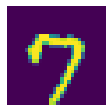

In [19]:
digit = X_train[1]
digit_pixels = digit.reshape(28, 28)
plt.subplot(132)
plt.imshow(digit_pixels)
plt.axis('off')


(-0.5, 27.5, 27.5, -0.5)

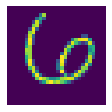

In [20]:
digit = X_train[2]
digit_pixels = digit.reshape(28, 28)
plt.subplot(133)
plt.imshow(digit_pixels)
plt.axis('off')

#Support vector Machine using default Hps




In [ ]:
clf = SVC( C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0)
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=5,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

# Support Vector Machine classifier manual tuning

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [25]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.937


Manual TUNING HPs

In [ ]:
#  pip install scikit-optimize

In [14]:

# # report scikit-optimize version number
# import skopt
# print('skopt %s' % skopt.__version__)

skopt 0.8.1


In [ ]:
pip install scikit_learn

In [ ]:
pip install "scikit_learn==0.22.2.post1"

In [19]:

# # define the space of hyperparameters to search
# search_space = list()
# search_space.append(Real(1e-6, 100.0, 'log-uniform', name='C'))
# search_space.append(Categorical(['linear', 'poly', 'rbf', 'sigmoid'], name='kernel'))
# search_space.append(Integer(1, 5, name='degree'))
# search_space.append(Real(1e-6, 100.0, 'log-uniform', name='gamma'))


In [20]:
# # define the function used to evaluate a given configuration
# @use_named_args(search_space)
# def evaluate_model(**params):
# 	# configure the model with specific hyperparameters
# 	model = SVC()
# 	model.set_params(**params)
# 	# define test harness
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# 	# calculate 5-fold cross validation
# 	result = cross_val_score(model, X, y, cv=cv, n_jobs=-1, scoring='accuracy')
# 	# calculate the mean of the scores
# 	estimate = mean(result)
# 	# convert from a maximizing score to a minimizing score
# 	return 1.0 - estimate

In [ ]:
# # perform optimization
# result = gp_minimize(evaluate_model, search_space)
# # summarizing finding:
# print('Best Accuracy: %.3f' % (1.0 - result.fun))
# print('Best Parameters: %s' % (result.x))

#Hyperparameters optimization

In [ ]:
# example of grid searching key hyperparametres for SVC
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))



In [ ]:
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))